# RANSAC for Image Alignment 
- A system for automatic image alignment via fast matching of their local image features

#### Part 1:
Get the local image feature keywords. (SIFT feature extraction from images)
#### Part 2:
Match features between A and B
#### Part 3:
Compute homography between A and B using least squares on set of matches (RANSAC algorithm for fast SIFT feature matching between two images.)

In [0]:
# import packages
import matplotlib.pyplot as plt
from PIL import Image 
import numpy as np
import cv2 ##import openCV2
import pandas as pd

#### Find keypoint:
    Gaussian smoothing
    Difference-of-gaussians:find extrema
    maxima suppression at edges.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
img1 = cv2.imread("/content/drive/My Drive/Colab Notebooks/New1.jpg") ## read source1.png and translate to gray scale.
img2 = cv2.imread("/content/drive/My Drive/Colab Notebooks/New2.jpg") ## read source1.png and translate to gray scale.

In [0]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB
orb = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.

kp1, description1 = orb.detectAndCompute(img1, None) ## detect and compute keypoints and descriptions
kp2, description2 = orb.detectAndCompute(img1, None) ## detect and compute keypoints and descriptions

In [0]:
def show_interest_points(img, kp_list):
    newImg = img.copy()
    for keypoint in kp_list:
        cur_color = np.random.rand(3)*255
        newImg = cv2.circle(newImg, (int(keypoint.pt[0]), int(keypoint.pt[1])), 5, cur_color, -1)
    return newImg


In [0]:
images1 = show_interest_points(img1,kp1)

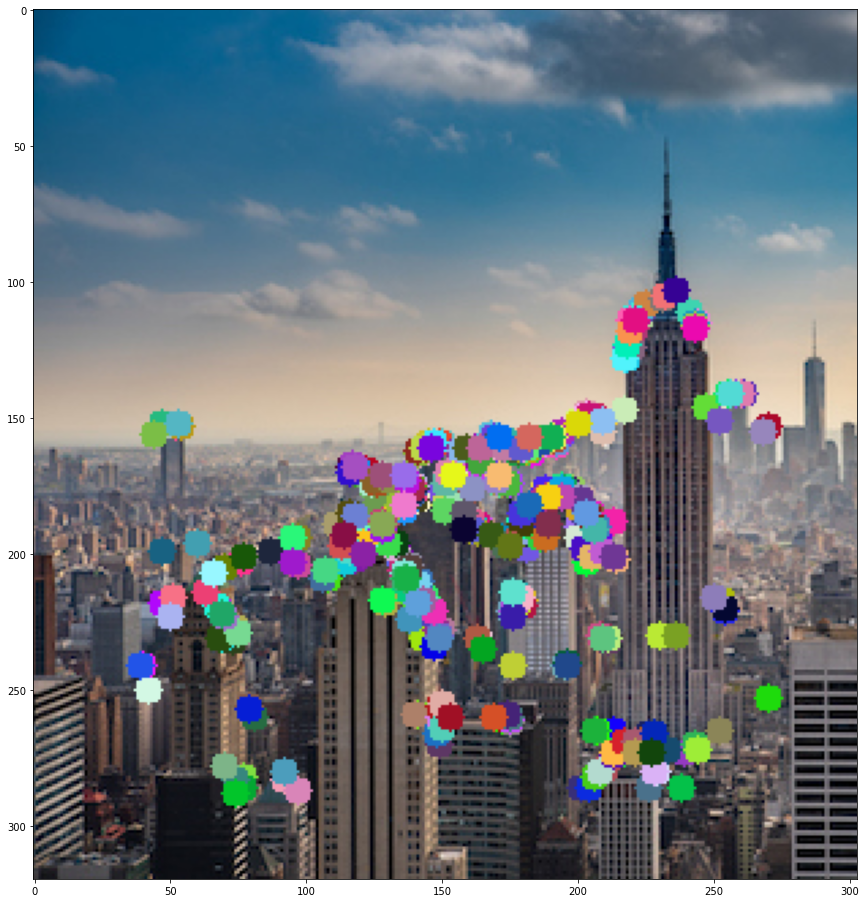

In [0]:
plt.figure(figsize=(16, 16))

plt.imshow(images1)

In [0]:
kp2, description2 = orb.detectAndCompute(img2, None) ## detect and compute keypoints and descriptions
images2 = show_interest_points(img2, kp2)

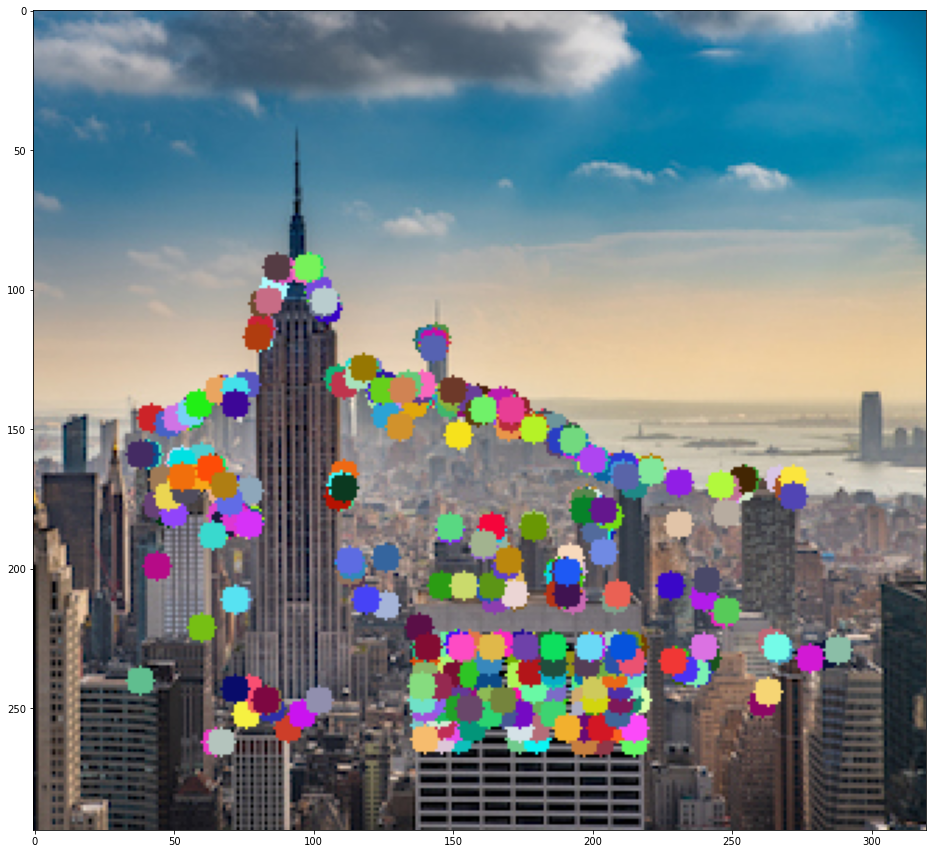

In [0]:
plt.figure(figsize=(16, 16))

plt.imshow(images2)


In [0]:
print(description2.shape)
print(description1.shape)

(470, 32)
(480, 32)


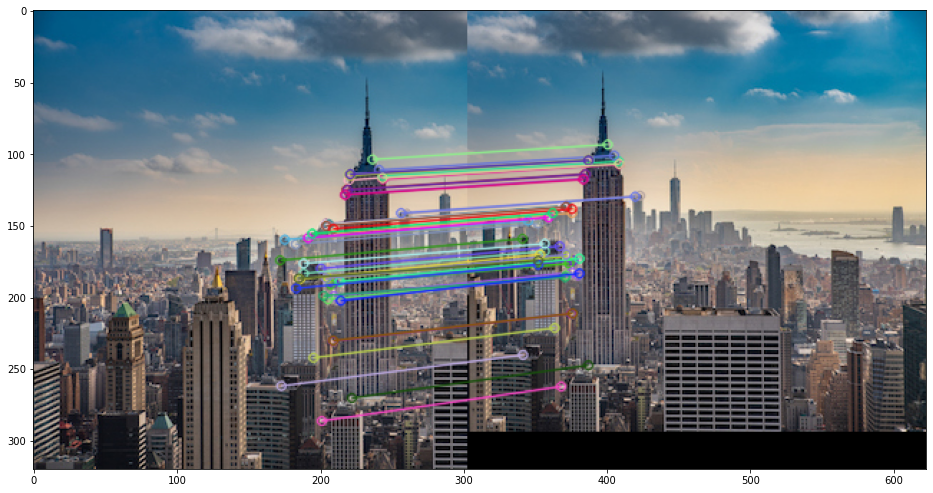

In [0]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# 3. Compute matches between both images.
matches = bf.match(description1, description2)
# 4. Sort the matches based on distance.
matches = sorted(matches, key = lambda x:x.distance)

img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], img2, flags=2) # Show top 10 matches
plt.figure(figsize=(16, 16))
plt.imshow(img_matches)
plt.show()

In [0]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt
    
# Use RANSAC to find the H (homography) matrix 
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)    


Text(0.5, 1.0, 'Transfered Image 2')

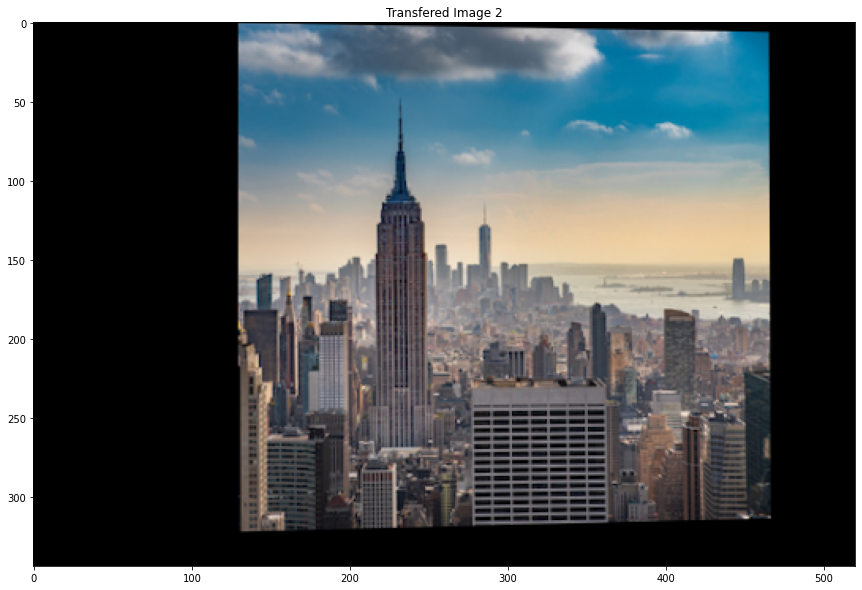

In [0]:
# Transfer Image_2 using H matrix
img_1 = img1
img_2 = img2

height, width, _ = img_2.shape
img_trans = cv2.warpPerspective(img_2, h, (width+200, height+50))

# Display the transfered image
plt.figure(figsize=(20,10))
plt.imshow(img_trans)
plt.title('Transfered Image 2')

Text(0.5, 1.0, 'Combined Image')

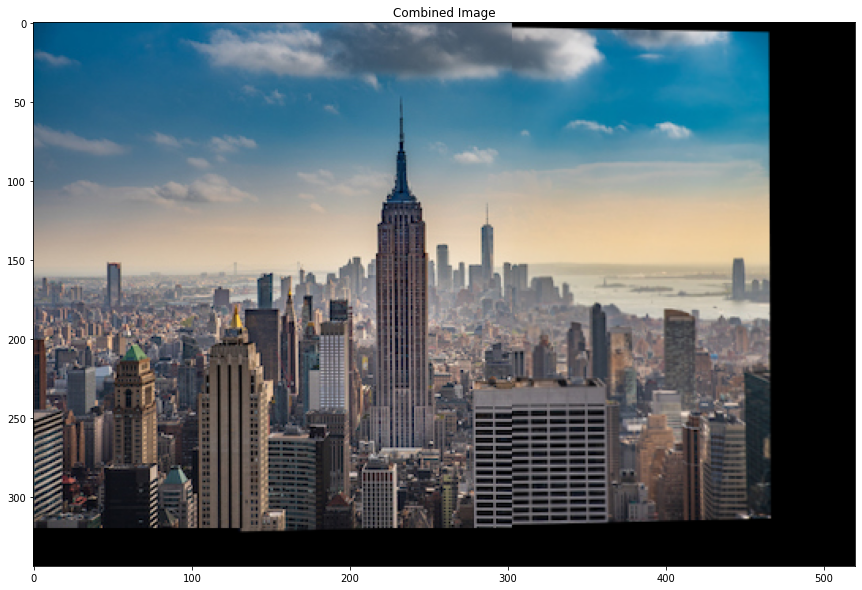

In [0]:
# Copy img_1 to the transfered image
h, w, c = img_1.shape
for i in range(h):
    for j in range(w):
        for k in range(c):
            img_trans[i,j,k] = img_1[i,j,k]

# Display the combined image            
plt.figure(figsize=(20,10))
plt.imshow(img_trans)
plt.title('Combined Image')
    